<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Aggregating-data-for-GCLM-statistics-results" data-toc-modified-id="Aggregating-data-for-GCLM-statistics-results-0.1"><span class="toc-item-num">0.1&nbsp;&nbsp;</span>Aggregating data for GCLM statistics results</a></span></li><li><span><a href="#Visualisation-between-differnet-organ-types-and-intensities" data-toc-modified-id="Visualisation-between-differnet-organ-types-and-intensities-0.2"><span class="toc-item-num">0.2&nbsp;&nbsp;</span>Visualisation between differnet organ types and intensities</a></span><ul class="toc-item"><li><span><a href="#Window-size-5-offset-1." data-toc-modified-id="Window-size-5-offset-1.-0.2.1"><span class="toc-item-num">0.2.1&nbsp;&nbsp;</span>Window size 5 offset 1.</a></span></li></ul></li><li><span><a href="#Visualisation-between-differnet-organ-types-and-intensities" data-toc-modified-id="Visualisation-between-differnet-organ-types-and-intensities-0.3"><span class="toc-item-num">0.3&nbsp;&nbsp;</span>Visualisation between differnet organ types and intensities</a></span><ul class="toc-item"><li><span><a href="#Window-size-5-offset-0." data-toc-modified-id="Window-size-5-offset-0.-0.3.1"><span class="toc-item-num">0.3.1&nbsp;&nbsp;</span>Window size 5 offset 0.</a></span></li></ul></li><li><span><a href="#Visualisation-between-differnet-organ-types-and-intensities" data-toc-modified-id="Visualisation-between-differnet-organ-types-and-intensities-0.4"><span class="toc-item-num">0.4&nbsp;&nbsp;</span>Visualisation between differnet organ types and intensities</a></span><ul class="toc-item"><li><span><a href="#Window-size-3-offset-0" data-toc-modified-id="Window-size-3-offset-0-0.4.1"><span class="toc-item-num">0.4.1&nbsp;&nbsp;</span>Window size 3 offset 0</a></span></li><li><span><a href="#Window-size-3-offset-1." data-toc-modified-id="Window-size-3-offset-1.-0.4.2"><span class="toc-item-num">0.4.2&nbsp;&nbsp;</span>Window size 3 offset 1.</a></span></li></ul></li></ul></li><li><span><a href="#Heatmaps-and-correlations-between-textures" data-toc-modified-id="Heatmaps-and-correlations-between-textures-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Heatmaps and correlations between textures</a></span><ul class="toc-item"><li><span><a href="#Functions-to-aggregate-data" data-toc-modified-id="Functions-to-aggregate-data-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Functions to aggregate data</a></span></li><li><span><a href="#Aggregating-data-for-analysis" data-toc-modified-id="Aggregating-data-for-analysis-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Aggregating data for analysis</a></span></li><li><span><a href="#Perform-Bhattcharrya-analysis-on-histograms-for-analysis" data-toc-modified-id="Perform-Bhattcharrya-analysis-on-histograms-for-analysis-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Perform Bhattcharrya analysis on histograms for analysis</a></span></li><li><span><a href="#Aggregate-df-information-from-analysis" data-toc-modified-id="Aggregate-df-information-from-analysis-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Aggregate df information from analysis</a></span></li><li><span><a href="#Count-of-aggregate-dataframe" data-toc-modified-id="Count-of-aggregate-dataframe-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Count of aggregate dataframe</a></span></li><li><span><a href="#Counting-non-zero-values" data-toc-modified-id="Counting-non-zero-values-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Counting non zero values</a></span></li><li><span><a href="#Visual-analysis-of-Bhattacharya-distance-between-texture-types-as-a-function-of-image-type." data-toc-modified-id="Visual-analysis-of-Bhattacharya-distance-between-texture-types-as-a-function-of-image-type.-1.7"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>Visual analysis of Bhattacharya distance between texture types as a function of image type.</a></span></li><li><span><a href="#Sub-set-heatmap-generation:" data-toc-modified-id="Sub-set-heatmap-generation:-1.8"><span class="toc-item-num">1.8&nbsp;&nbsp;</span>Sub set heatmap generation:</a></span><ul class="toc-item"><li><span><a href="#Functions" data-toc-modified-id="Functions-1.8.1"><span class="toc-item-num">1.8.1&nbsp;&nbsp;</span>Functions</a></span></li></ul></li></ul></li></ul></div>

In [1]:
import os 
import numpy as np
import pandas as pd
import re
import math
import matplotlib.pyplot as plt
import re
import pickle
from itertools import combinations
import seaborn as sns
import random
import math

In [2]:
os.chdir(r'C:\Users\niall\OneDrive\Documents\Data science masters\Thesis\Results\Texture Results\GCLM data run2')
file_list=os.listdir()

In [2]:
def get_file_info(tmp_nme):
    """the pull file names. """
    window_size=(tmp_nme[tmp_nme.find('_OFS_')-1:tmp_nme.find('_OFS_')])
    OFS_size=(tmp_nme[tmp_nme.find('_ang_')-1:tmp_nme.find('_ang_')])
    return [window_size,OFS_size]

In [3]:
def df_hist_gen(df,row,column,categories,fileinfo):
    """The purpose of this method is to generate an agglomerate histogram """
    df.reset_index(inplace=True,drop=True)
    for vals in categories:
        if (vals!=0): #and (vals!=63)
            df.reset_index(inplace=True,drop=True)
            plt.hist(df.loc[df[row]==vals,column],bins=20)
    plt.legend(categories[1:])
    file_name=column+fileinfo
    plt.savefig(file_name)
    plt.show()


## Aggregating data for GCLM statistics results

In [7]:
agg_arr=None

for file in file_list:
    
    file_name_info=get_file_info(file)
    tmp_arr=np.load(file)
    file_name_info=np.repeat(file_name_info,tmp_arr.shape[0])
    
    indx1=file_name_info[:int(file_name_info.shape[0]/2)]
    indx2=file_name_info[int(file_name_info.shape[0]/2):]
    trl=np.stack((indx1,indx2)).T
    tmp_arr=np.concatenate((tmp_arr,trl),axis=1)
    if agg_arr is None:
        agg_arr=tmp_arr
    else:
        agg_arr=np.concatenate((agg_arr,tmp_arr),axis=0)
        

In [9]:
df_vals=pd.DataFrame(agg_arr,columns=["contrast",'dissimilarity','homogeneity','energy','correlation','ASM','organ','window_size','OFS'])
df_vals.to_excel('texture_data_run1.xlsx')

In [5]:
df_vals=pd.read_excel('texture_data_run1.xlsx')

In [12]:
df_vals['window_size'].unique()


array([3, 5], dtype=int64)

In [20]:
df_val_win_3_OFS_0=df_vals[(df_vals['window_size']==3)&(df_vals['OFS']==0)]
df_val_win_5_OFS_0=df_vals[(df_vals['window_size']==5)&(df_vals['OFS']==0)]
df_val_win_3_OFS_1=df_vals[(df_vals['window_size']==3)&(df_vals['OFS']==1)]
df_val_win_5_OFS_1=df_vals[(df_vals['window_size']==3)&(df_vals['OFS']==1)]#.reset_index(inplace=True)


## Visualisation between differnet organ types and intensities
### Window size 5 offset 1.

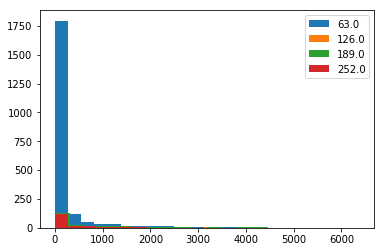

In [53]:
df_hist_gen(df_val_win_5_OFS_1,'organ','contrast',df_val_win_5_OFS_1['organ'].unique(),'win5ofs1.jpeg')


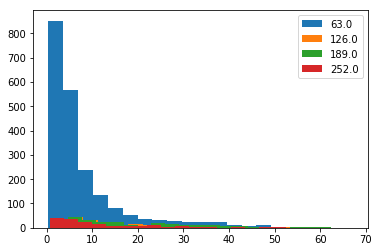

In [54]:
df_hist_gen(df_val_win_5_OFS_1,'organ','dissimilarity',df_val_win_5_OFS_1['organ'].unique(),'win5ofs1.jpeg') #,'homogeneity','energy','correlation','ASM','organ'

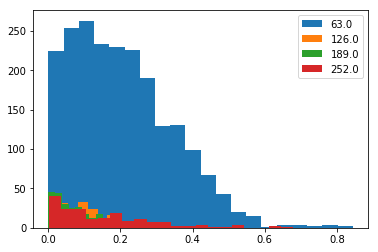

In [55]:
df_hist_gen(df_val_win_5_OFS_1,'organ','homogeneity',df_val_win_5_OFS_1['organ'].unique(),'win5ofs1.jpeg') #,,'energy',


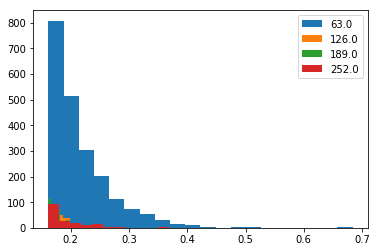

In [56]:
df_hist_gen(df_val_win_5_OFS_1,'organ','energy',df_val_win_5_OFS_1['organ'].unique(),'win5ofs1.jpeg')

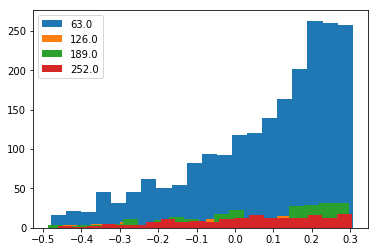

In [57]:
df_hist_gen(df_val_win_5_OFS_1,'organ','correlation',df_val_win_5_OFS_1['organ'].unique(),'win5ofs1.jpeg')#,'ASM','organ'

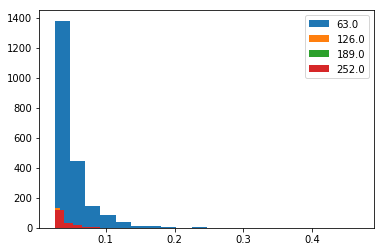

In [58]:
df_hist_gen(df_val_win_5_OFS_1,'organ','ASM',df_val_win_5_OFS_1['organ'].unique(),'win5ofs1.jpeg')#,'ASM','organ'

## Visualisation between differnet organ types and intensities
### Window size 5 offset 0.

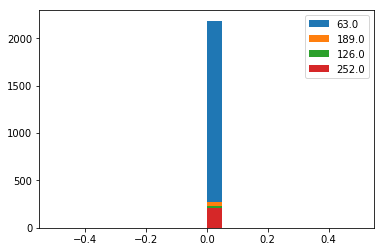

In [59]:
df_hist_gen(df_val_win_5_OFS_0,'organ','contrast',df_val_win_5_OFS_0['organ'].unique(),'win5ofs0.jpeg')


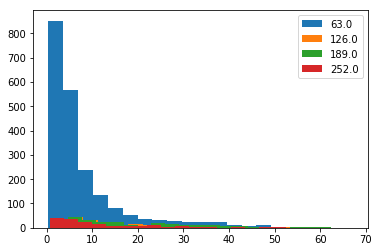

In [60]:
df_hist_gen(df_val_win_5_OFS_1,'organ','dissimilarity',df_val_win_5_OFS_1['organ'].unique(),'win5ofs0.jpeg') #,'homogeneity','energy','correlation','ASM','organ'

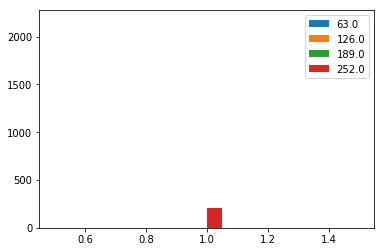

In [61]:
df_hist_gen(df_val_win_5_OFS_0,'organ','homogeneity',df_val_win_5_OFS_1['organ'].unique(),'win5ofs0.jpeg') #,,'energy',

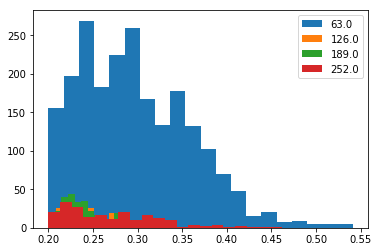

In [62]:
df_hist_gen(df_val_win_5_OFS_0,'organ','energy',df_val_win_5_OFS_1['organ'].unique(),'win5ofs0.jpeg')

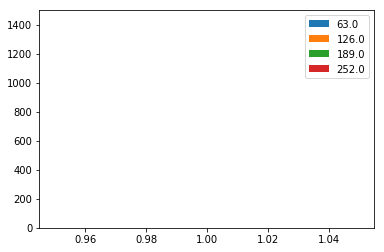

In [63]:
df_hist_gen(df_val_win_5_OFS_0,'organ','correlation',df_val_win_5_OFS_1['organ'].unique(),'win5ofs0.jpeg')#,'ASM','organ'

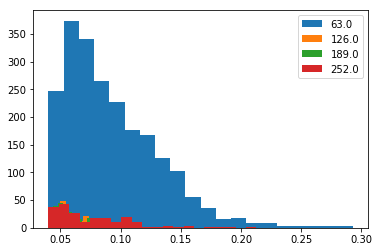

In [64]:
df_hist_gen(df_val_win_5_OFS_0,'organ','ASM',df_val_win_5_OFS_1['organ'].unique(),'win5ofs0.jpeg')#,'ASM','organ'

## Visualisation between differnet organ types and intensities
### Window size 3 offset 0
.

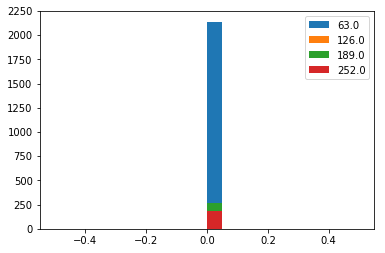

In [74]:
df_hist_gen(df_val_win_3_OFS_0,'organ','contrast',df_val_win_3_OFS_0['organ'].unique(),'win3ofs0.jpeg')


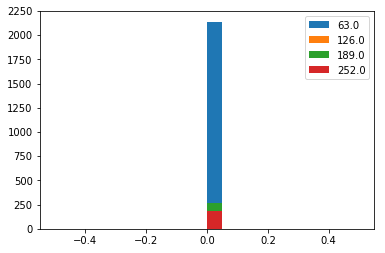

In [75]:
df_hist_gen(df_val_win_3_OFS_0,'organ','dissimilarity',df_val_win_3_OFS_0['organ'].unique(),'win3ofs0.jpeg') #,'homogeneity','energy','correlation','ASM','organ'

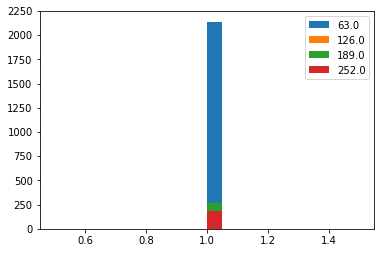

In [76]:
df_hist_gen(df_val_win_3_OFS_0,'organ','homogeneity',df_val_win_3_OFS_0['organ'].unique(),'win3ofs0.jpeg') #,,'energy',

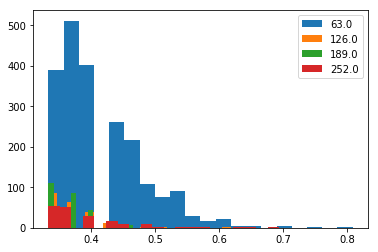

In [77]:
df_hist_gen(df_val_win_3_OFS_0,'organ','energy',df_val_win_3_OFS_0['organ'].unique(),'win3ofs0.jpeg')

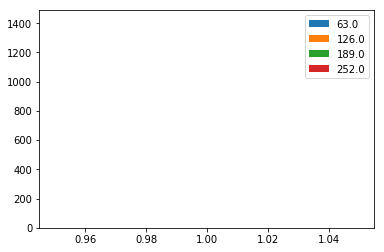

In [78]:
df_hist_gen(df_val_win_3_OFS_0,'organ','correlation',df_val_win_3_OFS_0['organ'].unique(),'win3ofs0.jpeg')#,'ASM','organ'

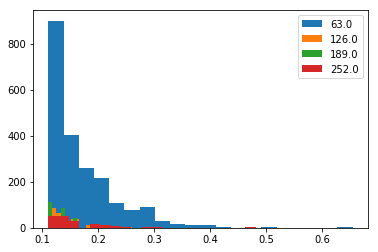

In [79]:
df_hist_gen(df_val_win_3_OFS_0,'organ','ASM',df_val_win_3_OFS_0['organ'].unique(),'win3ofs0.jpeg')#,'ASM','organ'

### Window size 3 offset 1.

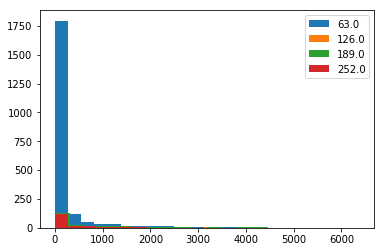

In [80]:
df_hist_gen(df_val_win_3_OFS_1,'organ','contrast',df_val_win_3_OFS_1['organ'].unique(),'win3ofs1.jpeg')


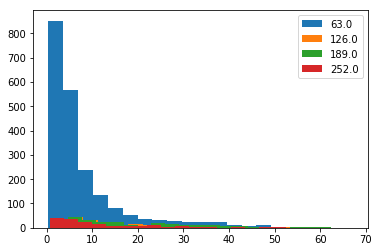

In [81]:
df_hist_gen(df_val_win_3_OFS_1,'organ','dissimilarity',df_val_win_3_OFS_1['organ'].unique(),'win3ofs1.jpeg') #,'homogeneity','energy','correlation','ASM','organ'

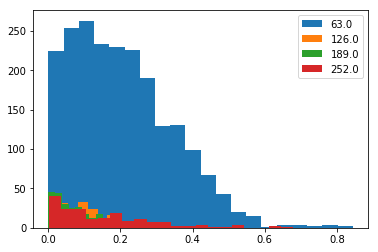

In [82]:
df_hist_gen(df_val_win_3_OFS_1,'organ','homogeneity',df_val_win_3_OFS_1['organ'].unique(),'win3ofs1.jpeg') #,,'energy',

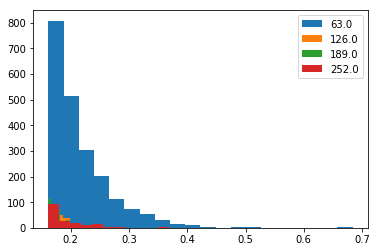

In [83]:
df_hist_gen(df_val_win_3_OFS_1,'organ','energy',df_val_win_3_OFS_1['organ'].unique(),'win3ofs1.jpeg')

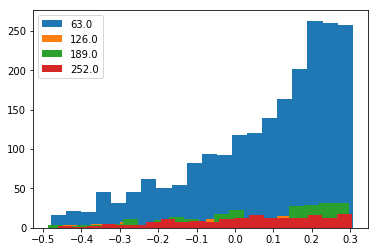

In [84]:
df_hist_gen(df_val_win_3_OFS_1,'organ','correlation',df_val_win_3_OFS_1['organ'].unique(),'win3ofs1.jpeg')#,'ASM','organ'

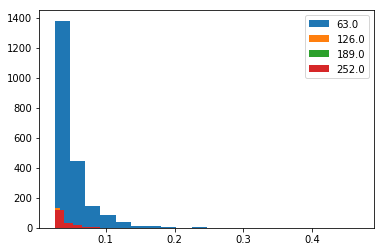

In [85]:
df_hist_gen(df_val_win_3_OFS_1,'organ','ASM',df_val_win_3_OFS_1['organ'].unique(),'win3ofs1.jpeg')#,'ASM','organ'

# Heatmaps and correlations between textures

## Functions to aggregate data

In [15]:
def get_agg_df(file_list):
    """The purpose of this method is to find the aggregate file information for aggregating data."""
    empty_file_info=[]

    for file in file_list:

        tmp_info=get_file_info(file,str_list)
        tmp_info.append(file)
        #tmp_info=tmp_info[:4]+tmp_info[-2:]
        empty_file_info.append(tmp_info)
        
    return empty_file_info

In [16]:
def get_agg_info(file_list):
    """The purpose of this method is to find the aggregate file information for aggregating data."""
    empty_file_info=[]

    for file in file_list:

        tmp_info=get_file_info(file,str_list)

        tmp_info=tmp_info[:4]+tmp_info[-2:]
        #print(tmp_info)
        cntr=1

        if len(empty_file_info)==0:
            empty_file_info.append(tmp_info)

        for vals in empty_file_info:
            if tmp_info==vals:
                break
            else:
                cntr+=1


        if cntr>len(empty_file_info):
            empty_file_info.append(tmp_info)
        
    return empty_file_info


In [17]:
def get_file_info(file_name,str_set):
    """The purpose of this method is to extract details from numpy array details"""
    #Patient specific information retrieved from file string
    #Iterate through string set for information. 
    ret_list=[]
    
    file_name=os.path.splitext(file_name)[0]
    
    for str_idx in range(0,len(str_set)-1):
        id_one=re.search(str_set[str_idx],file_name)
        id_two=re.search(str_set[str_idx+1],file_name)
        
        file_info=file_name[id_one.end():id_two.start()]
        
        ret_list.append(file_info)
   
    return ret_list
    

In [18]:
def remake_array(np_dict):
    """the purpose of this method is to rebuild numpy array based on initial values"""
    base_arr=np.zeros(np_dict['array_shape'],dtype=np_dict['dtype'])
    
    for vals in np_dict['non_zero_val_coord']:
        base_arr[vals[0],vals[1],vals[2],vals[3]]=vals[4]
        
    return base_arr

In [19]:
def open_pickle(pickle_file_name):
    """the purpose of this method is to generate  apickle file for analysis"""
    with open(pickle_file_name,'rb') as fb:
        ret_dict = pickle.load(fb)
        
    return ret_dict
    

In [20]:

def sample_dfs(sample_no,comp_org_df,anal_org_df):
    """The purpose of this method is to sample organs dataframes for Bhattcharya for """
    #Organ being analyzed for comparison on filename being extracted -1: position in the columns set. 
    org_comp_f_name=comp_org_df.iloc[sample_no,-1:][0]
    org_anal_f_name=anal_org_df.iloc[sample_no,-1:][0]
    #Openning pickles and remaking arrays
    org_comp_dict=open_pickle(org_comp_f_name)
    org_comp_arr=remake_array(org_comp_dict)
    
    org_anal_dict=open_pickle(org_anal_f_name)
    org_anal_arr=remake_array(org_anal_dict)
    
    #Return arrays of information for analysis 
    return (org_comp_arr,org_anal_arr)

In [46]:
def sample_single_dfs(sample_no,anal_org_df):
    """The purpose of this method is to sample organs dataframes for Bhattcharya for """
    #Organ being analyzed for comparison on filename being extracted -1: position in the columns set. 
    org_anal_f_name=anal_org_df.iloc[sample_no,-1:][0]
    #Openning pickles and remaking arrays
    org_anal_dict=open_pickle(org_anal_f_name)
    org_anal_arr=remake_array(org_anal_dict)
    
    #Return arrays of information for analysis 
    return org_anal_arr

In [21]:
def get_ang_num(ind_slc):
    """The purpose of this method is to return the angle of the GCLM given the array slice numbner"""
    
    if ind_slc==0:
        return 0
    elif ind_slc==1:
        return 45
    elif ind_slc==2:
        return 90
    elif ind_slc==3:
        return 135
    else:
        assert print('error incorrect angle found. ')
    

In [1]:
def bhattacharyya_distance(repr1, repr2):
    """Calculates Bhattacharyya distance (https://en.wikipedia.org/wiki/Bhattacharyya_distance)."""
    
    sim = -np.log(np.sum(np.sqrt(np.multiply(repr1,repr2))))
    
    #- np.log(np.sum([np.sqrt(p*q) for (p, q) in zip(repr1, repr2)]))
    
    assert not np.isnan(sim), 'Error: Similarity is nan.'
    if np.isinf(sim):
        # the similarity is -inf if no term in the review is in the vocabulary
        return 0
    return sim 

## Aggregating data for analysis

In [11]:
str_list=['Pat_id_','img_typ_','org_','_slc_no_','patch_no','_WindS_','_OFS_','4_ang_set']


In [12]:

os.chdir(r'C:\Users\niall\OneDrive\Documents\Data science masters\Thesis\Results\Texture Results\GCLM data run3')

file_list=os.listdir()

In [13]:
GCLM_spec=get_agg_info(file_list)
GCLM_spec[0]

['20', 'T1Dual_InPhase', 'Background', '10', '9', '0_']

In [23]:
file_agg_info=get_agg_df(file_list)
#len(file_agg_info)
GCLM_df=pd.DataFrame(file_agg_info,columns=['Patient_id','Image_type',
                                            'Organ_type','Slice_id',
                                            'Patch_id','Window_size',
                                            'Offset','File_name'])

GCLM_specs=pd.DataFrame(GCLM_spec,columns=['Patient_id','Image_type','Organ_type','Slice_no','Win_size','OFS'])
#GCLM_specs.to_excel('GCLM_specifications.xlsx')

In [24]:
GCLM_specs['OFS'].replace(regex=True,inplace=True,to_replace=r'\_',value=r'')
GCLM_specs['OFS']=pd.to_numeric(GCLM_specs['OFS'])

GCLM_df['Offset'].replace(regex=True,inplace=True,to_replace=r'\_',value=r'')
GCLM_df['Offset']=pd.to_numeric(GCLM_df['Offset'])

In [25]:
GCLM_df['Offset'].unique()

array([0, 1, 2], dtype=int64)

In [26]:
GCLM_specs['OFS'].unique()

array([0, 1, 2], dtype=int64)

In [138]:
GCLM_df.to_excel('GCLM_folder_df_windowsize_9.xlsx')
GCLM_specs.to_excel('GCLM_specifications_windowsize_9.xlsx')

## Perform Bhattcharrya analysis on histograms for analysis


In [16]:
os.chdir(r'C:\Users\niall\OneDrive\Documents\Data science masters\Thesis\Results\Texture Results\Aggregate_data\SPREADSHEET\Window_size_9')

GCLM_df=pd.read_excel('GCLM_folder_df_windowsize_9.xlsx')



In [17]:
GCLM_df.columns

Index(['Unnamed: 0', 'Patient_id', 'Image_type', 'Organ_type', 'Slice_id',
       'Patch_id', 'Window_size', 'Offset', 'File_name'],
      dtype='object')

In [18]:
GCLM_specs=pd.read_excel('GCLM_specifications_windowsize_9.xlsx')

In [30]:
GCLM_df.iloc[1:10,:]

,Unnamed: 0,Patient_id,Image_type,Organ_type,Slice_id,Patch_id,Window_size,Offset,File_name
1,1,20,T1Dual_InPhase,Background,10,1080,9,1,Pat_id_20img_typ_T1Dual_InPhaseorg_Background_...
2,2,20,T1Dual_InPhase,Background,10,1080,9,2,Pat_id_20img_typ_T1Dual_InPhaseorg_Background_...
3,3,20,T1Dual_InPhase,Background,10,11279,9,0,Pat_id_20img_typ_T1Dual_InPhaseorg_Background_...
4,4,20,T1Dual_InPhase,Background,10,11279,9,1,Pat_id_20img_typ_T1Dual_InPhaseorg_Background_...
5,5,20,T1Dual_InPhase,Background,10,11279,9,2,Pat_id_20img_typ_T1Dual_InPhaseorg_Background_...
6,6,20,T1Dual_InPhase,Background,10,15815,9,0,Pat_id_20img_typ_T1Dual_InPhaseorg_Background_...
7,7,20,T1Dual_InPhase,Background,10,15815,9,1,Pat_id_20img_typ_T1Dual_InPhaseorg_Background_...
8,8,20,T1Dual_InPhase,Background,10,15815,9,2,Pat_id_20img_typ_T1Dual_InPhaseorg_Background_...
9,9,20,T1Dual_InPhase,Background,10,18111,9,0,Pat_id_20img_typ_T1Dual_InPhaseorg_Background_...


In [19]:
GCLM_specs.head()

,Unnamed: 0,Patient_id,Image_type,Organ_type,Slice_no,Win_size,OFS
0,0,20,T1Dual_InPhase,Background,10,9,0_
1,1,20,T1Dual_InPhase,Background,10,9,1_
2,2,20,T1Dual_InPhase,Background,10,9,2_
3,3,20,T1Dual_InPhase,Background,1,9,0_
4,4,20,T1Dual_InPhase,Background,1,9,1_


In [90]:
os.chdir(r'C:\Users\niall\OneDrive\Documents\Data science masters\Thesis\Results\Texture Results\GCLM data run3')

In [13]:


def Create_Bhatt_dist_df_org_comp(GCLM_specs,GCLM_df,
                         No_samples=50,No_angles=4):
    
    #Storage list for all data results stored for analysis when rig is running. 
    Final_list=[]


    #Iterate through patients 
    for vals in GCLM_specs.iterrows():
        #Getting organ types for a specific slice together with a specific patient and mri type               
        spec_df=GCLM_df.loc[(GCLM_df['Patient_id']==vals[1]['Patient_id'])&(GCLM_df['Image_type']==vals[1]['Image_type'])&(GCLM_df['Offset']==vals[1]['OFS'])&(GCLM_df['Window_size']==vals[1]['Win_size'])&(GCLM_df['Slice_id']==vals[1]['Slice_no']),
             :]
        #print(spec_df)
        #Getting organ types specific to df overhead. 
        org_types=spec_df['Organ_type'].unique().tolist()
        #If number of organs present in image are >1 comparative analysis can be performed. 
        idx_orgns=list(combinations(org_types, 2))
        add_info=vals[1].tolist()

        for org_combo in idx_orgns:

            #iterate though organ types present in ds above. 
            Orgns,Comp_org=org_combo
            #print('analysed Organ:',Orgns)
            #print('Compared organ:',Comp_org)
            #Sample from organ list for a maximum of fifty
            sample_no=min(spec_df['Organ_type'].value_counts())-1

            if sample_no>No_samples:
                sample_no=No_samples
            #Getting organ specific dataframe for analysis

                
            org_anal_df=spec_df.loc[spec_df['Organ_type']==Orgns,:]

            org_comp_df=spec_df.loc[spec_df['Organ_type']==Comp_org,:]
            #org_comp_df=org_comp_df.reset_index(inplace=True,drop=True)
            while sample_no>0:

                org_comp_arr,org_anal_arr=sample_dfs(sample_no,org_comp_df,org_anal_df)

                #Iterating through the four different angles for analysis
                for i in range(0,No_of_angles):
                    angle=get_ang_num(i)
                    org_comp_arr_ang=org_comp_arr[:,:,:,i]
                    org_anal_arr_ang=org_anal_arr[:,:,:,i]

                    uniq_vals_org_comp=np.unique(org_comp_arr_ang,return_counts=True)
                    uniq_vals_org_anal=np.unique(org_anal_arr_ang,return_counts=True)

                    #Bhattacharyya distance 
                    Bhatt_dist=bhattacharyya_distance(org_comp_arr_ang, org_anal_arr_ang)

                    Patch_id_org_comp=org_comp_df.iloc[sample_no,5]
                    Patch_id_org_anal=org_anal_df.iloc[sample_no,5]


                    #if Bhatt_dist>0.5:

                     #       print(uniq_vals_org_comp)
                       #     print(uniq_vals_org_anal)
                      #      print('Bhattacharyya distance:',Bhatt_dist)

                    final_result=add_info[1:]+[Orgns,Comp_org,Patch_id_org_anal,Patch_id_org_comp,angle,Bhatt_dist]
                    Final_list.append(final_result)
                #Sample Number reduced with each value. 
                sample_no-=1

    return Final_list



In [14]:


def Create_Bhatt_dist_df_org_sim(GCLM_specs,GCLM_df,No_angles=4):
    """The purpose of this method is to perform inter organ comparison to confirm that the organs can be distinguished. """
    #Storage list for all data results stored for analysis when rig is running. 
    Final_list=[]

    #Iterate through patients 
    for vals in GCLM_specs.iterrows():
        #Getting organ types for a specific slice together with a specific patient and mri type               
        spec_df=GCLM_df.loc[(GCLM_df['Patient_id']==vals[1]['Patient_id'])&(GCLM_df['Image_type']==vals[1]['Image_type'])&(GCLM_df['Offset']==vals[1]['OFS'])&(GCLM_df['Window_size']==vals[1]['Win_size'])&(GCLM_df['Slice_id']==vals[1]['Slice_no']),
             :]
        #print(spec_df)
        #Getting organ types specific to df overhead. 
        org_types=spec_df['Organ_type'].unique().tolist()
        #If number of organs present in image are >1 comparative analysis can be performed.
        add_info=vals[1].tolist()

        for orgs in org_types:

            #print('analysed Organ:',Orgns)
            #print('Compared organ:',Comp_org)
            #Getting number of unique patches
            Uniq_patch_per_org=spec_df.loc[spec_df['Organ_type']==orgs,'Patch_id'].unique()
            #print(Uniq_patch_per_org)
            sample_no=min(spec_df.loc[spec_df['Organ_type']==orgs,'Patch_id'].value_counts())-1
            #Reducing sampling if organs are larger
            if Uniq_patch_per_org.shape[0]>5:
                Uniq_patch_per_org=Uniq_patch_per_org[:5]
                
            patch_combo=list(combinations(Uniq_patch_per_org, 2))

            #Getting organ specific dataframe for analysis
            
            for P_2_P_combo in patch_combo:
                
                patch_1,patch_2=P_2_P_combo
                #print(patch_1)
                #print(patch_2)
                org_anal_df=spec_df.loc[(spec_df['Organ_type']==orgs)&(spec_df['Patch_id']==patch_1),:]
                #print(org_anal_df)
                org_comp_df=spec_df.loc[(spec_df['Organ_type']==orgs)&(spec_df['Patch_id']==patch_2),:]
            #org_comp_df=org_comp_df.reset_index(inplace=True,drop=True)
       

                org_comp_arr,org_anal_arr=sample_dfs(0,org_comp_df,org_anal_df)

                #Iterating through the four different angles for analysis
                for i in range(0,No_angles):
                    angle=get_ang_num(i)
                    org_comp_arr_ang=org_comp_arr[:,:,:,i]
                    org_anal_arr_ang=org_anal_arr[:,:,:,i]

                    uniq_vals_org_comp=np.unique(org_comp_arr_ang,return_counts=True)
                    uniq_vals_org_anal=np.unique(org_anal_arr_ang,return_counts=True)

                    #Bhattacharyya distance 
                    Bhatt_dist=bhattacharyya_distance(org_comp_arr_ang, org_anal_arr_ang)


                    final_result=add_info[1:]+[orgs,patch_1,patch_2,angle,Bhatt_dist]
                    #print(final_result)
                    Final_list.append(final_result)
                #Sample Number reduced with each value. 
                sample_no-=1
                
    return Final_list



In [50]:
GCLM_df.head()

,Unnamed: 0,Patient_id,Image_type,Organ_type,Slice_id,Patch_id,Window_size,Offset,File_name
0,0,20,T1Dual_InPhase,Background,10,12741,7,0,Pat_id_20img_typ_T1Dual_InPhaseorg_Background_...
1,1,20,T1Dual_InPhase,Background,10,12741,7,1,Pat_id_20img_typ_T1Dual_InPhaseorg_Background_...
2,2,20,T1Dual_InPhase,Background,10,12741,7,2,Pat_id_20img_typ_T1Dual_InPhaseorg_Background_...
3,3,20,T1Dual_InPhase,Background,10,13116,7,0,Pat_id_20img_typ_T1Dual_InPhaseorg_Background_...
4,4,20,T1Dual_InPhase,Background,10,13116,7,1,Pat_id_20img_typ_T1Dual_InPhaseorg_Background_...


In [110]:
final_list=Create_Bhatt_dist_df_org_sim(GCLM_specs,GCLM_df,No_angles=4)

c:\users\niall\anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.


In [97]:
pwd

'C:\\Users\\niall\\OneDrive\\Documents\\Data science masters\\Thesis\\Results\\Texture Results\\GCLM data run3'

## Aggregate df information from analysis

In [111]:
Bhatt_dist_df=pd.DataFrame(final_list,columns=['patient_id','Image_type','Organ_type','Slice_no','Window_size',
                                              'Offset','Organ_type','Patch_id1','Patch_id2',
                                              'Angle_used','Bhatt_distance']) #,'Organ_1','Organ_2'

In [112]:
Bhatt_dist_df.to_excel('Bhattcharrya_dist_inter_org_sim_windsize_9.xlsx')

In [177]:
Bhatt_dist_df_1=pd.read_excel('Bhattcharrya_dist_info_1_to_1284idx.xlsx')

In [178]:
Bhatt_dist_df_merge=pd.concat([Bhatt_dist_df_1,Bhatt_dist_df])
Bhatt_dist_df_merge.reset_index(drop=True,inplace=True)


c:\users\niall\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


## Count of aggregate dataframe

In [184]:
Bhatt_dist_df_great_0=Bhatt_dist_df_merge[Bhatt_dist_df_merge['Bhatt_distance']>0.0]

In [186]:
df_agg=Bhatt_dist_df_great_0.groupby(['Organ_1','Organ_2']).size().reset_index().rename(columns={0:'count'})
df_agg.to_excel('Org_to_org_comp_bhattdist_great_0.xlsx')

In [187]:
df_agg_total=Bhatt_dist_df_merge.groupby(['Organ_1','Organ_2']).size().reset_index().rename(columns={0:'count'})
df_agg_total.to_excel('Org_to_org_comp_bhattdist_allvalues.xlsx')

,Organ_1,Organ_2,count
0,Background,Liver,164400
1,Background,l_kidney,162524
2,Background,r_kidney,157608
3,Background,spleen,56400
4,Liver,l_kidney,110400
5,Liver,r_kidney,110400
6,Liver,spleen,56400
7,l_kidney,r_kidney,152808
8,l_kidney,spleen,24000
9,r_kidney,spleen,24000


In [192]:
Bhatt_dist_df_merge_calc=Bhatt_dist_df_merge.loc[:,['Angle_used', 'Bhatt_distance', 'Image_type', 'Offset', 
                                                                       'Organ_1','Organ_2', 'Organ_type', 'Window_size']]

In [ ]:

Bhatt_dist_median=Bhatt_dist_df_merge_calc.groupby(['Angle_used','Image_type','Offset',
                                                  'Window_size','Organ_1','Organ_2']).std().reset_index()




## Counting non zero values

In [115]:
os.chdir(r'C:\Users\niall\OneDrive\Documents\Data science masters\Thesis\Results\Texture Results\Aggregate_data\SPREADSHEET\WINDOW 7')

In [121]:
Bhatt_dist_df_merge_calc_tmp=pd.read_excel('Bhattcharrya_dist_inter_org_sim_windsize_7.xlsx')

In [137]:
Bhatt_dist_df_merge_calc_tmp.head()

,Unnamed: 0,patient_id,Image_type,Organ_type,Slice_no,Window_size,Offset,Organ_type.1,Patch_id1,Patch_id2,Angle_used,Bhatt_distance
0,0,20,T1Dual_InPhase,Background,10,7,0,Background,12741,13116,0,0.082509
1,1,20,T1Dual_InPhase,Background,10,7,0,Background,12741,13116,45,0.082509
2,2,20,T1Dual_InPhase,Background,10,7,0,Background,12741,13116,90,0.082509
3,3,20,T1Dual_InPhase,Background,10,7,0,Background,12741,13116,135,0.082509
4,4,20,T1Dual_InPhase,Background,10,7,0,Background,12741,14672,0,0.154151


In [15]:

def gen_perc_zero_df(Bhatt_dist_df_merge_calc,
                    group_params=['Angle_used','Image_type','Offset',
                                                      'Window_size','Organ_type.1'],
                    index_values=['Angle_used','Image_type','Offset','Window_size','Organ_type.1']): #other parameters 'Organ_1','Organ_2'
    """The purpose of this method is to determine the % of non zero values Bhatt distance present"""
    Bhatt_dist_df_merge_zero_val = Bhatt_dist_df_merge_calc.groupby(group_params).agg(lambda x: x.eq(0).sum())

    Bhatt_dist_df_merge_nonzero_val = Bhatt_dist_df_merge_calc.groupby(group_params).agg(lambda x: x.ne(0).sum())

    Bhatt_dist_df_merge_sum = Bhatt_dist_df_merge_calc.groupby(group_params).agg(lambda x: x.count())
    
    Bhatt_dist_df_merge_sum['Non_zero']=Bhatt_dist_df_merge_nonzero_val['Bhatt_distance']
    Bhatt_dist_df_merge_sum['Zero']=Bhatt_dist_df_merge_zero_val['Bhatt_distance']

    #Bhatt_dist_df_merge_sum.drop(['Organ_type'],inplace=True)
    Bhatt_dist_df_merge_sum['Perc_nonzero']=Bhatt_dist_df_merge_sum['Non_zero']/Bhatt_dist_df_merge_sum['Bhatt_distance']
    Bhatt_dist_df_merge_sum.reset_index(level=index_values, inplace=True)
    
    #Bhatt_dist_df_merge_sum['Median'] = Bhatt_dist_df_merge_calc.groupby(group_params).median()
    Bhatt_dist_df_merge_sum_mean = Bhatt_dist_df_merge_calc.groupby(group_params).agg(lambda x: x.mean())
    Bhatt_dist_df_merge_sum_mean.reset_index(inplace=True,drop=True)
    print(Bhatt_dist_df_merge_sum_mean.head())
    Bhatt_dist_df_merge_sum['Mean']=Bhatt_dist_df_merge_sum_mean
        #Dropping unnessary columns
    Column_vals=Bhatt_dist_df_merge_sum.columns.tolist()+['Mean','Median','Non_zero','Zero','Perc_nonzero']
    Necessary_column_vals=['Bhatt_distance']+['Non_zero','Zero','Perc_nonzero']+group_params
    #If column not present in necessary columns then drop it 
    Col_strip=[x for x in Column_vals if x not in Necessary_column_vals]
    print(Col_strip)
    Bhatt_dist_df_merge_sum.drop(Col_strip,axis=1,inplace=True)
    
    return Bhatt_dist_df_merge_sum

In [164]:
Bhatt_non_zero_vals=gen_perc_zero_df(Bhatt_dist_df_merge_calc)
Bhatt_non_zero_vals.head()

   Bhatt_distance     Patch_id1     Patch_id2  Slice_no    Unnamed: 0  \
0        0.324117  11647.315254  12845.593220  7.186441  26003.084746   
1        0.348766  11317.220588  13515.144118  8.676471  31212.117647   
2        0.302053  10950.364444  12766.231111  8.311111  28469.555556   
3        0.138744  10396.000000  12156.453333  8.488889  27286.444444   
4        0.805182   9669.850000  12636.750000  9.500000  48874.000000   

   patient_id  
0   11.254237  
1    6.647059  
2    9.422222  
3   10.266667  
4    3.000000  


ValueError: Wrong number of items passed 6, placement implies 1

In [140]:
Bhatt_non_zero_vals.to_excel('Bhatt_dist_nonzero_counts_inter_org_win7.xlsx')

In [2]:
os.chdir(r'C:\Users\niall\OneDrive\Documents\Data science masters\Thesis\Results\Texture Results\Aggregate_data')

In [144]:
output_file_path=r'C:\Users\niall\OneDrive\Documents\Data science masters\Thesis\Results\Texture Results\Aggregate_data\BOXPLOTS\RUN3 WINDOW 7\Inter_org_comp'

In [146]:


def gen_boxplot_stat_visuals(Bhatt_dist_df_merge_sum,
                             image_types,
                             filter_params,
                             dst_path,
                            str_add='_perc_non_zero.jpeg'):
    
    """The purpose of this method is to generate a staticial visualisations of Bhattacharya distance"""
    
    for imgs in images_types:
        tmp_df=Bhatt_dist_df_merge_sum.loc[Bhatt_dist_df_merge_sum['Image_type']==imgs,:]

        for params in filter_params:
            ax = sns.boxplot(x=params, y="Perc_nonzero", data=tmp_df)
            file_name=imgs+'_'+params+str_add
            file_name=os.path.join(dst_path,file_name)
            ax.get_figure().savefig(file_name)
            plt.clf()
        

In [150]:
Bhatt_non_zero_vals.columns

Index(['Angle_used', 'Image_type', 'Offset', 'Window_size', 'Organ_type.1',
       'Bhatt_distance', 'Non_zero', 'Zero', 'Perc_nonzero'],
      dtype='object')

In [151]:
images_types_info=Bhatt_non_zero_vals['Image_type'].unique()
Other_parameters=['Angle_used','Offset','Window_size','Organ_type.1']

In [152]:
images_types_info

array(['T1Dual_InPhase', 'T1Dual_OutPhase', 'T2SPIR_data'], dtype=object)

In [154]:
gen_boxplot_stat_visuals(Bhatt_non_zero_vals,images_types_info,Other_parameters,output_file_path)

<Figure size 432x288 with 0 Axes>

## Visual analysis of Bhattacharya distance between texture types as a function of image type.

In [26]:
Bhatt_dist_df_merge_calc['Image_type'].unique()

array(['T1Dual_InPhase', 'T1Dual_OutPhase', 'T2SPIR_data'], dtype=object)

In [28]:
Bhatt_dist_special=Bhatt_dist_df_merge_calc.loc[(Bhatt_dist_df_merge_calc['Image_type']=='T1Dual_OutPhase')&(Bhatt_dist_df_merge_calc['Offset']==0)&(Bhatt_dist_df_merge_calc['Offset']==0),:]

In [54]:
Bhatt_dist_special.loc[(Bhatt_dist_special['Organ_1']=='Background')&(Bhatt_dist_special['Organ_2']=='Liver'),:].head()

,Unnamed: 0,Image_type,Organ_type,Slice_no,Window_size,Offset,Organ_1,Organ_2,window_size,window_size.1,Angle_used,Bhatt_distance
34200,34200,T1Dual_OutPhase,Background,10,7,0,Background,Liver,7,7,0,0.591885
34201,34201,T1Dual_OutPhase,Background,10,7,0,Background,Liver,7,7,45,0.591885
34202,34202,T1Dual_OutPhase,Background,10,7,0,Background,Liver,7,7,90,0.591885
34203,34203,T1Dual_OutPhase,Background,10,7,0,Background,Liver,7,7,135,0.591885
34204,34204,T1Dual_OutPhase,Background,10,7,0,Background,Liver,7,7,0,1.241665


In [48]:
import itertools

In [68]:
Combination_parameters=[Bhatt_dist_special['Angle_used'].unique().tolist(),
                        Bhatt_dist_special['Organ_1'].unique().tolist(),
                        Bhatt_dist_special['Organ_2'].unique().tolist()]

Combo_1=list(itertools.product(*Combination_parameters))

for vals in Combo_1:
    
    if vals[1]==vals[2]:
        Combo_1.remove(vals)


In [ ]:
Combo_1

In [ ]:
for params in Combo_1:
    tmp_df2=Bhatt_dist_special.loc[(Bhatt_dist_special['Angle_used']==params[0])&(Bhatt_dist_special['Organ_1']==params[1])&(Bhatt_dist_special['Organ_2']==params[2]),'Bhatt_distance']
    tmp_df3=Bhatt_dist_special.loc[(Bhatt_dist_special['Angle_used']==params[0])&(Bhatt_dist_special['Organ_1']==params[2])&(Bhatt_dist_special['Organ_2']==params[1]),'Bhatt_distance']
    tmp_df5=Bhatt_dist_special.loc[(Bhatt_dist_special['Organ_1']==params[2])&(Bhatt_dist_special['Organ_2']==params[1]),:]
    tmp_df6=Bhatt_dist_special.loc[(Bhatt_dist_special['Organ_1']==params[1])&(Bhatt_dist_special['Organ_2']==params[2]),:]
    
    tmp_df4=pd.concat([tmp_df5,tmp_df6])
    tmp_count1=tmp_df4[tmp_df4['Bhatt_distance']==0].count()[0]
    tmp_count_nonzero=(tmp_df4.count()[0]-tmp_count1)/tmp_df4.count()[0]
    tmp_count_zero=(tmp_count1)/tmp_df4.count()[0]
    top=[('% non zero',tmp_count_nonzero),('% zero',tmp_count_zero)]
    labels, ys = zip(*top)
    xs = np.arange(len(labels)) 
    width = 1

    fig = plt.figure()                                                               
    ax = fig.gca()  #get current axes
    ax.bar(xs, ys, width, align='center')

    #Remove the default x-axis tick numbers and  
    #use tick numbers of your own choosing:
    ax.set_xticks(xs)
    #Replace the tick numbers with strings:
    ax.set_xticklabels(labels)
    #Remove the default y-axis tick numbers and  
    #use tick numbers of your own choosing:
    ax.set_yticks(ys)
    
    
    #ax = sns.distplot(tmp_df4, kde=False, rug=True);
    #ax=sns.boxplot(x='Angle_used',y='Bhatt_distance',data=tmp_df4)
    file_name=str(params[1])+'_'+str(params[2])+'_'+'_win7_OFS_0_T1DOPH_bar_perc_0.jpeg'
    ax.get_figure().savefig(file_name)
    plt.clf()

In [209]:
Mean=pd.read_excel('Bhatt_Dist_mean_values.xlsx')
Median=pd.read_excel('Bhatt_Dist_median_values.xlsx')
Skew=pd.read_excel('Bhatt_Dist_skew_values.xlsx')
Max=pd.read_excel('Bhatt_Dist_max_values.xlsx')
Min=pd.read_excel('Bhatt_Dist_min_values.xlsx')
Kurtosis=pd.read_excel('Bhatt_Dist_kurtosis_values.xlsx')
Std_dev=pd.read_excel('Bhatt_Dist_stddev_values.xlsx')

In [212]:
Bhatt_desc_stat=Mean
Bhatt_desc_stat['Median']=Median['Bhatt_distance']
Bhatt_desc_stat['Max']=Max['Bhatt_distance']
Bhatt_desc_stat['Min']=Min['Bhatt_distance']
Bhatt_desc_stat['Kurtosis']=Kurtosis['Bhatt_distance']
Bhatt_desc_stat['Std_dev']=Std_dev['Bhatt_distance']
Bhatt_desc_stat['Skew']=Skew['Bhatt_distance']
Bhatt_desc_stat.head()



,Unnamed: 0,Angle_used,Image_type,Offset,Window_size,Organ_1,Organ_2,Bhatt_distance,Median,Max,Min,Kurtosis,Std_dev,Skew
0,0,0,T1Dual_InPhase,0,3,Background,Liver,0.122095,0,1.098612,0,4.353486,0.307186,2.421082
1,1,0,T1Dual_InPhase,0,3,Background,l_kidney,0.123007,0,1.098612,0,4.326289,0.306186,2.404394
2,2,0,T1Dual_InPhase,0,3,Background,r_kidney,0.120762,0,1.098612,0,4.474279,0.304363,2.435491
3,3,0,T1Dual_InPhase,0,3,Background,spleen,0.122109,0,1.098612,0,4.196357,0.308569,2.394516
4,4,0,T1Dual_InPhase,0,3,Liver,l_kidney,0.108466,0,1.098612,0,5.546075,0.273389,2.584751


## Sub set heatmap generation:

### Functions

In [27]:
def blockshaped(arr, nrows, ncols):
    """
    Return an array of shape (n, nrows, ncols) where
    n * nrows * ncols = arr.size

    If arr is a 2D array, the returned array should look like n subblocks with
    each subblock preserving the "physical" layout of arr.
    """
    h, w = arr.shape
    assert h % nrows == 0, "{} rows is not evenly divisble by {}".format(h, nrows)
    assert w % ncols == 0, "{} cols is not evenly divisble by {}".format(w, ncols)
    return (arr.reshape(h//nrows, nrows, -1, ncols)
               .swapaxes(1,2)
               .reshape(-1, nrows, ncols))

In [28]:
def agg_np_wrapper(arr_in,dim):
    """wrapper for 4 dimensional array"""
    arr_dim=arr_in.shape[3]
    merge_array=None
    for i in range(0,arr_dim):
        #print(i)
        #print(arr_in.shape)
        sqz_arr=np.squeeze(arr_in[:,:,:,i],2)
        #print(sqz_arr.shape)
        tmp_agg_blk=agg_np_arr(sqz_arr,dim,dim)
    
        if merge_array is None:
            merge_array=tmp_agg_blk
        else:
            merge_array=np.dstack((merge_array,tmp_agg_blk))
            
    return merge_array
        
    
        
        

In [29]:
def agg_np_arr(arr,r,c):
    """The purpose of this method is to split and aggregate a numpy array to produce a more coherenet representation"""
    #Split array into compment parts
    split_arr=blockshaped(arr,r,c)
    
    agg_list=[]
    for blks in split_arr:
        tmp_val=blks.sum()
        agg_list.append(tmp_val)
        
    dim1=arr.shape[0]
    
    reshape_dim=int(math.sqrt((dim1*dim1)/(r*r)))
    
    final_array=np.array(agg_list)
    
    return final_array.reshape((reshape_dim,reshape_dim))
    

In [37]:
def gen_heatmap_subplot(df_input,
                        offsets,
                        window_size,
                        sample_size=5,agg_arr_val=4):
    
    #Getting parameter combinations
    subplot_num=1
    
    #No_combo=len(param_combo)

    concat_array=None
    for OFS in offsets:
    
        df_filter=df_input.loc[(df_input['Offset']==OFS)&(df_input['Window_size']==window_size),:]
    
        rand_sample=random.sample(range(0,df_filter.shape[1]-1),sample_size)
        
        empty_array=None
        #Iterating through random sample and filtering data off. 
        for idx in rand_sample:
            #print(df_filter.head())
            org_comp_arr,org_anal_arr=sample_dfs(idx,df_filter,df_filter)
            #print(org_comp_arr.shape)
            #Generating cumulative sum histogram display
            org_comp_arr=agg_np_wrapper(org_comp_arr,agg_arr_val)
            
            if empty_array is None:
                empty_array=org_comp_arr
            else:
                empty_array=org_comp_arr#+empty_array)/2
        #Iterating through the array for cooccurence matrices 
        print(empty_array.shape)
        if concat_array is None:
            concat_array=empty_array
        else:
            concat_array=np.dstack((concat_array,empty_array))
    print(concat_array.shape) 
    fig = plt.figure(figsize = (20,20)) # width x height
    ax1 = fig.add_subplot(3, 4, 1) # row, column, position
    ax2 = fig.add_subplot(3, 4, 2)
    ax3 = fig.add_subplot(3, 4, 3)
    ax4 = fig.add_subplot(3, 4, 4)
    ax5 = fig.add_subplot(3, 4, 5)
    ax6 = fig.add_subplot(3, 4, 6)
    ax7 = fig.add_subplot(3, 4, 7)
    ax8 = fig.add_subplot(3, 4, 8)
    ax9 = fig.add_subplot(3, 4, 9)
    ax10 = fig.add_subplot(3, 4, 10)
    ax11 = fig.add_subplot(3, 4, 11)
    ax12 = fig.add_subplot(3, 4, 12)
    # cmap = cmap,
    sns.heatmap(data=concat_array[:,:,0], ax=ax1, square=True, cbar_kws={'shrink': .3}, annot=False)#, annot_kws={'fontsize': 12}
    sns.heatmap(data=concat_array[:,:,1], ax=ax2, square=True, cbar_kws={'shrink': .3}, annot=False)
    sns.heatmap(data=concat_array[:,:,2], ax=ax3, square=True, cbar_kws={'shrink': .3}, annot=False)
    sns.heatmap(data=concat_array[:,:,3], ax=ax4, square=True, cbar_kws={'shrink': .3}, annot=False)
    sns.heatmap(data=concat_array[:,:,4], ax=ax5, square=True, cbar_kws={'shrink': .3}, annot=False)
    sns.heatmap(data=concat_array[:,:,5], ax=ax6, square=True, cbar_kws={'shrink': .3}, annot=False)
    sns.heatmap(data=concat_array[:,:,6], ax=ax7, square=True, cbar_kws={'shrink': .3}, annot=False)
    sns.heatmap(data=concat_array[:,:,7], ax=ax8, square=True, cbar_kws={'shrink': .3}, annot=False)
    sns.heatmap(data=concat_array[:,:,8], ax=ax9, square=True, cbar_kws={'shrink': .3}, annot=False)
    sns.heatmap(data=concat_array[:,:,9], ax=ax10, square=True, cbar_kws={'shrink': .3}, annot=False)
    sns.heatmap(data=concat_array[:,:,10], ax=ax11, square=True, cbar_kws={'shrink': .3}, annot=False)
    sns.heatmap(data=concat_array[:,:,11], ax=ax12, square=True, cbar_kws={'shrink': .3}, annot=False)
 
    return concat_array


In [31]:
uniq_images=GCLM_df['Image_type'].unique()
uniq_orgns=GCLM_df['Organ_type'].unique()

In [39]:
Test_df[:10]

,Patient_id,Image_type,Organ_type,Slice_id,Patch_id,Window_size,Offset,File_name
1155,20,T1Dual_InPhase,Liver,10,1044,9,0,Pat_id_20img_typ_T1Dual_InPhaseorg_Liver_slc_n...
1156,20,T1Dual_InPhase,Liver,10,1044,9,1,Pat_id_20img_typ_T1Dual_InPhaseorg_Liver_slc_n...
1157,20,T1Dual_InPhase,Liver,10,1044,9,2,Pat_id_20img_typ_T1Dual_InPhaseorg_Liver_slc_n...
1158,20,T1Dual_InPhase,Liver,10,11137,9,0,Pat_id_20img_typ_T1Dual_InPhaseorg_Liver_slc_n...
1159,20,T1Dual_InPhase,Liver,10,11137,9,1,Pat_id_20img_typ_T1Dual_InPhaseorg_Liver_slc_n...
1160,20,T1Dual_InPhase,Liver,10,11137,9,2,Pat_id_20img_typ_T1Dual_InPhaseorg_Liver_slc_n...
1161,20,T1Dual_InPhase,Liver,10,12761,9,0,Pat_id_20img_typ_T1Dual_InPhaseorg_Liver_slc_n...
1162,20,T1Dual_InPhase,Liver,10,12761,9,1,Pat_id_20img_typ_T1Dual_InPhaseorg_Liver_slc_n...
1163,20,T1Dual_InPhase,Liver,10,12761,9,2,Pat_id_20img_typ_T1Dual_InPhaseorg_Liver_slc_n...
1164,20,T1Dual_InPhase,Liver,10,1442,9,0,Pat_id_20img_typ_T1Dual_InPhaseorg_Liver_slc_n...


In [44]:
test_file=Test_df.iloc[1,-1]
test_file

'Pat_id_20img_typ_T1Dual_InPhaseorg_l_kidney_slc_no_10patch_no10418_WindS_9_OFS_1_4_ang_set.pickle'

In [59]:
trl_arr=sample_single_dfs(7,Test_df)
trl_arr2=np.squeeze(trl_arr[:,:,:,0],2)
trl_arr2.shape

(256, 256)

In [61]:
np.unique(trl_arr2,return_counts=True)

(array([0.        , 0.00694444, 0.01388889, 0.03472222, 0.06944444,
        0.11111111, 0.16666667, 0.25      ]),
 array([65520,     4,     2,     2,     5,     1,     1,     1],
       dtype=int64))

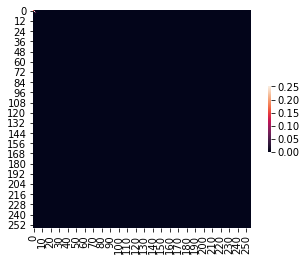

In [60]:

sns.heatmap(data=trl_arr2, square=True, cbar_kws={'shrink': .3}, annot=False)

In [40]:
Patient_id=GCLM_df['Patient_id'].unique()
Slice_id=GCLM_df.loc[(GCLM_df['Patient_id']==Patient_id[0])&(GCLM_df['Image_type']==uniq_images[0])&(GCLM_df['Organ_type']==uniq_orgns[1]),'Slice_id'].unique()
Test_df=GCLM_df.loc[(GCLM_df['Patient_id']==Patient_id[0])&(GCLM_df['Image_type']==uniq_images[0])&(GCLM_df['Organ_type']==uniq_orgns[2])&(GCLM_df['Slice_id']==Slice_id[0]),:]

(64, 64, 4)
(64, 64, 4)
(64, 64, 4)
(64, 64, 12)


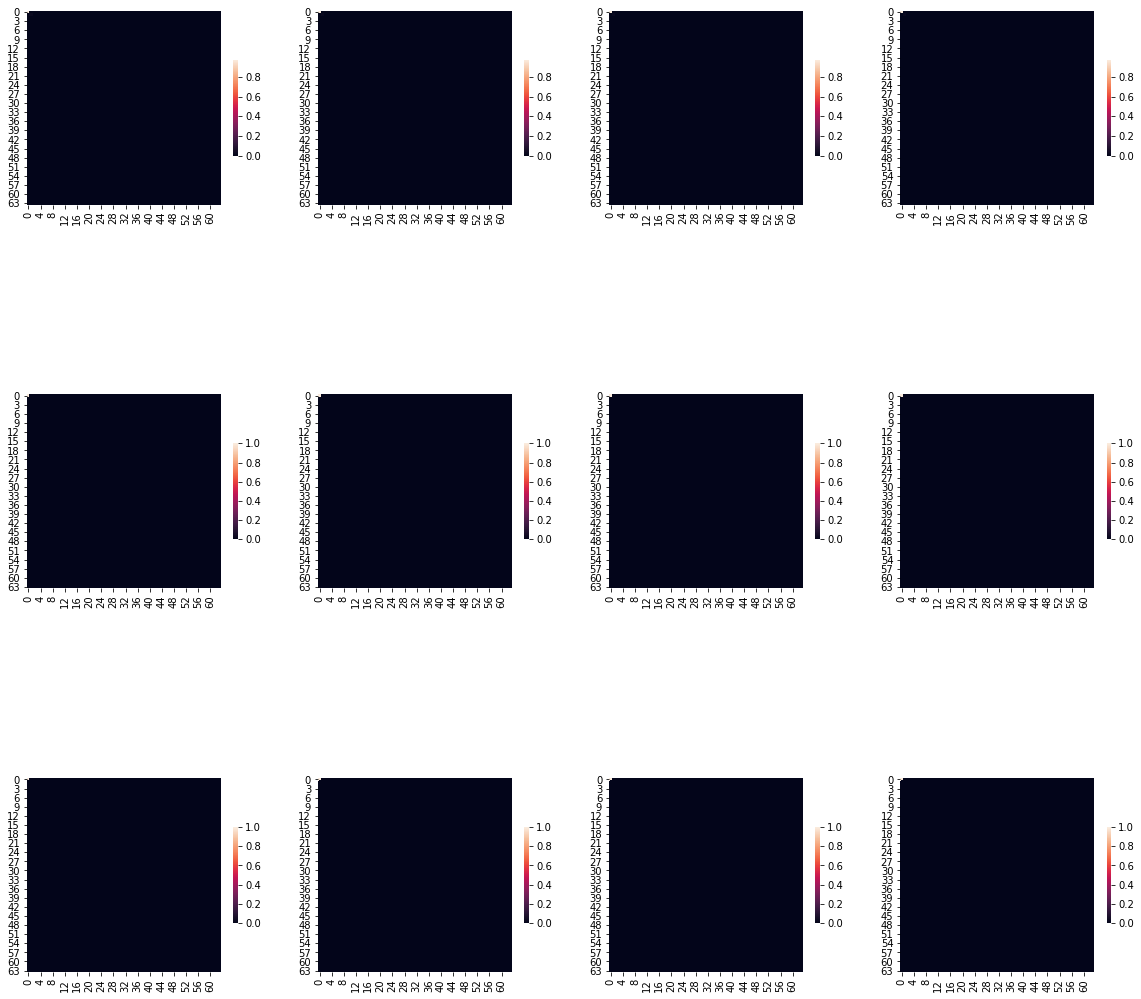

In [41]:
trl_arr_tmp=gen_heatmap_subplot(Test_df,
                        [0,1,2],
                        '9',sample_size=5)